## Introduction: 

This exercise introduces the concept of conditional probability .. In this ex. we will need to import conditional.py .. 

http://greenteapress.com/thinkstats/conditional.py


Imagine that someone you know is pregnant, and it is the beginning of Week 39. What is the chance that the baby will be born in the next week? 
How much does the answer change if it’s a first baby?
We can answer these questions by computing a conditional probability, which is a probability that depends on a condition. In this case, the condition is that we know the baby didn’t arrive during Weeks 0–38. 

Here’s one way to do it:

1. Given a PMF, generate a fake cohort of 1000 pregnancies. For each number of weeks, x, the number of pregnancies with duration x is 1000 PMF(x)

2. Remove from the cohort all pregnancies with length less than 39

3. Compute the PMF of the remaining durations; the result is the conditional PMF

4. Evaluate the conditional PMF at x = 39 weeks

another way ==> This algorithm is conceptually clear, but not very efficient. A simple alternative is to remove from the distribution the values less than 39 and then renormalize.

## Ex. 2.7: 
- Write a function that implements either of these algorithms and computes the probability that a baby will be born during Week 39, given that it was not born prior to Week 39.

- Generalize the function to compute the probability that a baby will be born during Week x, given that it was not born prior to Week x, for all x. Plot this value as a function of x for first babies and others.



In [2]:
import survey
import first
# import conditional
import Pmf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
pregnecies = np.round((51 - 0)*np.random.random(1000))
len(pregnecies)  ## 1000 preg. 

1000

Note: 
Repeatition is allowed ! .. 

I don't get this statement ! ==> 
(For each number of weeks, x, the number of pregnancies with duration x is 1000 PMF(x)) ..

Is that means to calc PMF for ALL the 1000 preg. and then test the condition of number of preg. with duration x has to be 1000*PMF(x) ?! .. 

let's test this logic over week 39 ! 

In [39]:
preg_dict = Pmf.MakePmfFromList(pregnecies)
preg_dict

In [40]:
preg_dict.d

{0.0: 0.009000000000000001,
 1.0: 0.022,
 2.0: 0.02,
 3.0: 0.01,
 4.0: 0.015,
 5.0: 0.019,
 6.0: 0.023,
 7.0: 0.022,
 8.0: 0.012,
 9.0: 0.021,
 10.0: 0.012,
 11.0: 0.02,
 12.0: 0.018000000000000002,
 13.0: 0.015,
 14.0: 0.024,
 15.0: 0.021,
 16.0: 0.023,
 17.0: 0.016,
 18.0: 0.017,
 19.0: 0.017,
 20.0: 0.016,
 21.0: 0.015,
 22.0: 0.022,
 23.0: 0.024,
 24.0: 0.017,
 25.0: 0.015,
 26.0: 0.023,
 27.0: 0.019,
 28.0: 0.02,
 29.0: 0.024,
 30.0: 0.026000000000000002,
 31.0: 0.018000000000000002,
 32.0: 0.025,
 33.0: 0.031,
 34.0: 0.023,
 35.0: 0.02,
 36.0: 0.018000000000000002,
 37.0: 0.016,
 38.0: 0.018000000000000002,
 39.0: 0.018000000000000002,
 40.0: 0.018000000000000002,
 41.0: 0.017,
 42.0: 0.031,
 43.0: 0.016,
 44.0: 0.023,
 45.0: 0.03,
 46.0: 0.023,
 47.0: 0.016,
 48.0: 0.024,
 49.0: 0.013000000000000001,
 50.0: 0.019,
 51.0: 0.006}

In [41]:
x = 39 
number_preg_w39 = 1000*preg_dict.d.values()[39]
number_preg_w39

18.000000000000004

Then we have 10 pregnencies expected to have their babies in week 39 ! ..

Let's double check .. by counting the number of preg. in pregnency cohort of 1000 preg. 

In [42]:
counter = 0
for i in pregnecies:
    if(i == 39):
        counter = counter + 1
counter

18

#### Matched results ;) 

In [43]:
## removing from the cohort all preg. less than 39 
late_preg = []
for i in pregnecies:
    if(i >= 39):
        late_preg.append(i)
len(late_preg)

254

## Conditional probability:

In [44]:
late_preg_dict = Pmf.MakePmfFromList(late_preg)
late_preg_dict

In [45]:
late_preg_dict.d

{39.0: 0.07086614173228346,
 40.0: 0.07086614173228346,
 41.0: 0.06692913385826771,
 42.0: 0.1220472440944882,
 43.0: 0.06299212598425197,
 44.0: 0.09055118110236221,
 45.0: 0.11811023622047244,
 46.0: 0.09055118110236221,
 47.0: 0.06299212598425197,
 48.0: 0.09448818897637795,
 49.0: 0.051181102362204724,
 50.0: 0.07480314960629922,
 51.0: 0.023622047244094488}

## The 2nd way:
removing from pmf and then normalizing .. 

In [46]:
k_ = []
v_ = []

for i in xrange(len(preg_dict.d.keys())):
    if(preg_dict.d.keys()[i] >= 39):
        k_.append(preg_dict.d.keys()[i])
        v_.append(preg_dict.d.values()[i])
k_, v_

([39.0,
  40.0,
  41.0,
  42.0,
  43.0,
  44.0,
  45.0,
  46.0,
  47.0,
  48.0,
  49.0,
  50.0,
  51.0],
 [0.018000000000000002,
  0.018000000000000002,
  0.017,
  0.031,
  0.016,
  0.023,
  0.03,
  0.023,
  0.016,
  0.024,
  0.013000000000000001,
  0.019,
  0.006])

In [47]:
# factor=1.0/sum(v_)
normalized_d = [float(i)/sum(v_) for i in v_]

In [48]:
normalized_d

[0.07086614173228348,
 0.07086614173228348,
 0.06692913385826772,
 0.12204724409448818,
 0.06299212598425197,
 0.0905511811023622,
 0.11811023622047244,
 0.0905511811023622,
 0.06299212598425197,
 0.09448818897637795,
 0.05118110236220473,
 0.0748031496062992,
 0.023622047244094488]

This is an evidance that they were already normalized ! 

## Generalized function:


In [49]:
def generic_conditonal(pregnecies, week):
    preg_dict = Pmf.MakePmfFromList(pregnecies)
    
    for i in pregnecies:
        if(i >= week):
            late_preg.append(i)
            
    late_preg_dict = Pmf.MakePmfFromList(late_preg)
    
    return preg_dict.d, late_preg_dict.d

In [50]:
preg_dict_, late_preg_dict_ = generic_conditonal(pregnecies, 33)
preg_dict_, late_preg_dict_

({0.0: 0.009000000000000001,
  1.0: 0.022,
  2.0: 0.02,
  3.0: 0.01,
  4.0: 0.015,
  5.0: 0.019,
  6.0: 0.023,
  7.0: 0.022,
  8.0: 0.012,
  9.0: 0.021,
  10.0: 0.012,
  11.0: 0.02,
  12.0: 0.018000000000000002,
  13.0: 0.015,
  14.0: 0.024,
  15.0: 0.021,
  16.0: 0.023,
  17.0: 0.016,
  18.0: 0.017,
  19.0: 0.017,
  20.0: 0.016,
  21.0: 0.015,
  22.0: 0.022,
  23.0: 0.024,
  24.0: 0.017,
  25.0: 0.015,
  26.0: 0.023,
  27.0: 0.019,
  28.0: 0.02,
  29.0: 0.024,
  30.0: 0.026000000000000002,
  31.0: 0.018000000000000002,
  32.0: 0.025,
  33.0: 0.031,
  34.0: 0.023,
  35.0: 0.02,
  36.0: 0.018000000000000002,
  37.0: 0.016,
  38.0: 0.018000000000000002,
  39.0: 0.018000000000000002,
  40.0: 0.018000000000000002,
  41.0: 0.017,
  42.0: 0.031,
  43.0: 0.016,
  44.0: 0.023,
  45.0: 0.03,
  46.0: 0.023,
  47.0: 0.016,
  48.0: 0.024,
  49.0: 0.013000000000000001,
  50.0: 0.019,
  51.0: 0.006},
 {33.0: 0.04889589905362776,
  34.0: 0.0362776025236593,
  35.0: 0.031545741324921134,
  36.0: 0.028

<Container object of 52 artists>

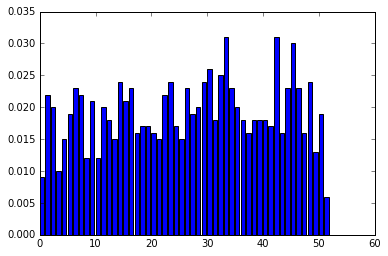

In [51]:
plt.bar(preg_dict_.keys(), preg_dict_.values())

<Container object of 19 artists>

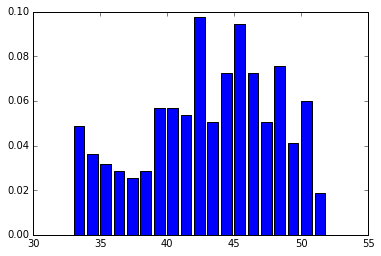

In [52]:
plt.bar(late_preg_dict_.keys(), late_preg_dict_.values())

## almost the same dictribution .. 

1st plot contains all list of pregnencies while the 2nd one is after trimming all those less than 33 weeks .. 

Next step is to apply the same concept (conditional probability) on pregnencies data to check the distributions of 1st babies and others .. 

In [18]:
table = survey.Pregnancies()
table.ReadRecords()
outcome_ = np.zeros([len(table.records), 1])

for i in xrange(len(table.records)):
    outcome_[i] = table.records[i].outcome

In [19]:
outcome_ ## if 1 then alive baby

array([[ 1.],
       [ 1.],
       [ 1.],
       ..., 
       [ 2.],
       [ 1.],
       [ 1.]])

In [20]:
alive_counter = 0 

for baby in outcome_:
    if (baby == 1):
        alive_counter = alive_counter + 1
    else:
        continue 

In [21]:
alive_counter

9148

partitioning data to obtain first babies and others ..

In [22]:
data = table.GetFields()

In [23]:
## read all data in dataframe .. then partition the dataframe table into two tables 
df = pd.DataFrame([])

header =  [case[0] for (i, case) in enumerate(data)]  ## append, appends rows !! 
header = np.transpose(header)
header

array(['caseid', 'nbrnaliv', 'babysex', 'birthwgt_lb', 'birthwgt_oz',
       'prglength', 'outcome', 'birthord', 'agepreg', 'finalwgt'], 
      dtype='|S11')

In [24]:
Value_to_push = []
with open("2002FemPreg.dat","r") as io:
    for l in io:
        if len(l) > 100:
            for (i,case) in enumerate(data):
                try: 
                    Value_to_push.append([case[3](l[case[1]:case[2]])])
#                     print(Value_to_push)
                except ValueError: 
                    continue

In [25]:
partitions = first.PartitionRecords(table)
partitions

(<survey.Pregnancies at 0x7fc630108e90>,
 <survey.Pregnancies at 0x7fc630108f10>)

In [26]:
first_baby = partitions[0]
others = partitions[1]
len(first_baby), len(others)

(4413, 4735)

In [27]:
## tables 
t = first.MakeTables()
original_table = t[0]
firsts_table = t[1]
others_table = t[2]

original_table, firsts_table, others_table

(<survey.Pregnancies at 0x7fc6306819d0>,
 <survey.Pregnancies at 0x7fc62f786950>)

In [28]:
first_baby_ = np.zeros([len(firsts_table.records), 1])

for i in xrange(len(firsts_table.records)):
    try:
        first_baby_[i] = firsts_table.records[i].prglength
    except ValueError:
        first_baby_[i] = 0

In [29]:
first_baby_, len(first_baby_)

(array([[ 39.],
        [ 39.],
        [ 38.],
        ..., 
        [ 39.],
        [ 34.],
        [ 39.]]), 4413)

In [30]:
others_baby_ = np.zeros([len(others_table.records), 1])

for i in xrange(len(others_table.records)):
    try:
        others_baby_[i] = others_table.records[i].prglength
    except ValueError:
        others_baby_[i] = 0

In [31]:
others_baby_, len(others_baby_)

(array([[ 39.],
        [ 39.],
        [ 39.],
        ..., 
        [ 39.],
        [ 39.],
        [ 39.]]), 4735)

(first_baby_ and others_baby_) are considered the data colummns .. we gonna calc their PMFs and conditional probabilities for 39 weeks and compare the results .. 

## First babies:

first_baby_ is seen as list of lists .. we have to convert it to single list to be able to call MakePmfFromList()

In [32]:
import itertools
merged = list(itertools.chain(*first_baby_))
len(merged)

4413

In [33]:
week = 39
normal_preg, late_preg = generic_conditonal(merged, week)
normal_preg, late_preg

({0.0: 0.00022660321776569228,
  17.0: 0.00022660321776569228,
  20.0: 0.00022660321776569228,
  21.0: 0.00022660321776569228,
  22.0: 0.0006798096532970768,
  23.0: 0.00022660321776569228,
  24.0: 0.0015862225243598459,
  25.0: 0.00022660321776569228,
  26.0: 0.0036256514842510764,
  27.0: 0.00022660321776569228,
  28.0: 0.005438477226376614,
  29.0: 0.0020394289598912306,
  30.0: 0.016542034896895538,
  31.0: 0.003399048266485384,
  32.0: 0.012463176977113076,
  33.0: 0.0063448900974393836,
  34.0: 0.006571493315205076,
  35.0: 0.03602991162474507,
  36.0: 0.03897575345569907,
  37.0: 0.04713346929526399,
  38.0: 0.0616360752322683,
  39.0: 0.47903920235667347,
  40.0: 0.12145932472241106,
  41.0: 0.08157715839564922,
  42.0: 0.04645365964196692,
  43.0: 0.01971447994561523,
  44.0: 0.005211874008610923,
  45.0: 0.0013596193065941536,
  46.0: 0.00022660321776569228,
  47.0: 0.00022660321776569228,
  48.0: 0.0006798096532970768},
 {33.0: 0.003048006096012192,
  34.0: 0.005588011176022

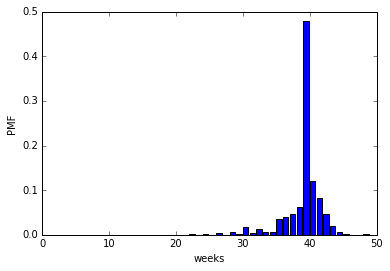

In [34]:
plt.bar(normal_preg.keys(), normal_preg.values())
plt.xlabel('weeks')
plt.ylabel('PMF')

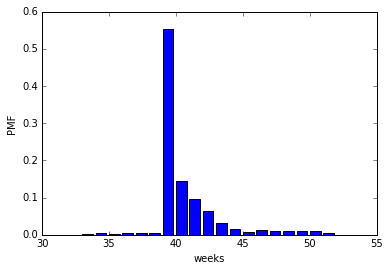

In [35]:
plt.bar(late_preg.keys(), late_preg.values())
plt.xlabel('weeks')
plt.ylabel('PMF')

## Comment:
plotting bar chart for first preg. in the normal case as well as the conditional probability case show the following:
1. In the normal case, the distribution of first_babies is almost normal .. with high PMF value at week 39 .. 
2. there are outliers after 44 and before 30 .. hence the majority of the data clustered between 35 and 43 
3. the distribution in the conditional prob. case, shows a positively skewed curve with a peak at week 39 .. this means that first babies usually come at week 39 and it is very rare to have thm after week # 50 

## Let's do the same for (Others):

In [53]:
import itertools
merged_ = list(itertools.chain(*others_baby_))
len(merged_)

4735

In [54]:
week = 39
normal_others, late_others = generic_conditonal(merged_, week)
normal_others, late_others

({4.0: 0.00021119324181626187,
  9.0: 0.00021119324181626187,
  13.0: 0.00021119324181626187,
  17.0: 0.00021119324181626187,
  18.0: 0.00021119324181626187,
  19.0: 0.00021119324181626187,
  21.0: 0.00021119324181626187,
  22.0: 0.0008447729672650475,
  24.0: 0.0012671594508975714,
  25.0: 0.00042238648363252375,
  26.0: 0.004012671594508976,
  27.0: 0.00042238648363252375,
  28.0: 0.001689545934530095,
  29.0: 0.0025343189017951427,
  30.0: 0.013727560718057022,
  31.0: 0.0025343189017951427,
  32.0: 0.012671594508975712,
  33.0: 0.0044350580781415,
  34.0: 0.006546990496304118,
  35.0: 0.032101372756071805,
  36.0: 0.03146779303062302,
  37.0: 0.05216473072861668,
  38.0: 0.07074973600844772,
  39.0: 0.5446673706441394,
  40.0: 0.12249208025343189,
  41.0: 0.04794086589229145,
  42.0: 0.02597676874340021,
  43.0: 0.012882787750791975,
  44.0: 0.004857444561774023,
  45.0: 0.0008447729672650475,
  48.0: 0.0008447729672650475,
  50.0: 0.00042238648363252375},
 {33.0: 0.007316497521831

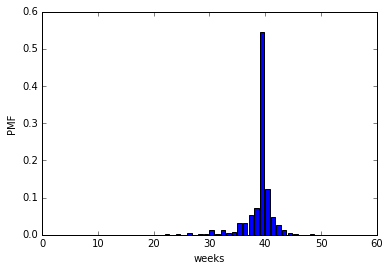

In [55]:
plt.bar(normal_others.keys(), normal_others.values())
plt.xlabel('weeks')
plt.ylabel('PMF')

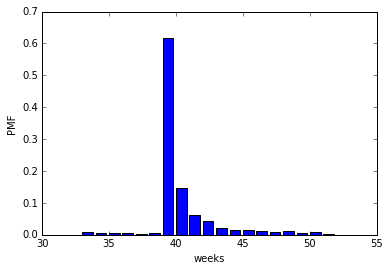

In [56]:
plt.bar(late_others.keys(), late_others.values())
plt.xlabel('weeks')
plt.ylabel('PMF')

## Comment:
- almost the same distribution like first_babies .. 
- the probability of having first_babies before 39 is slightly higher than that one of other_babies .. 
- the probability of having first_baby at week 50 is higher than that one of other_babies ..


==> we might also plot both charts on the same grid for better visualization .. 